In [1]:
%matplotlib inline

In [2]:
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
import seaborn as sns
import ctbenchmark as ctb

# Gaussian peak problem description

In [3]:
problem = ctb.CentralTendencyGaussianPeakProblem10N()
function = problem.getFunction()
distribution = problem.getDistribution()
problem_name = problem.getName()

/home/g88077/miniconda4/envs/uqwind/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/g88077/miniconda4/envs/uqwind/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


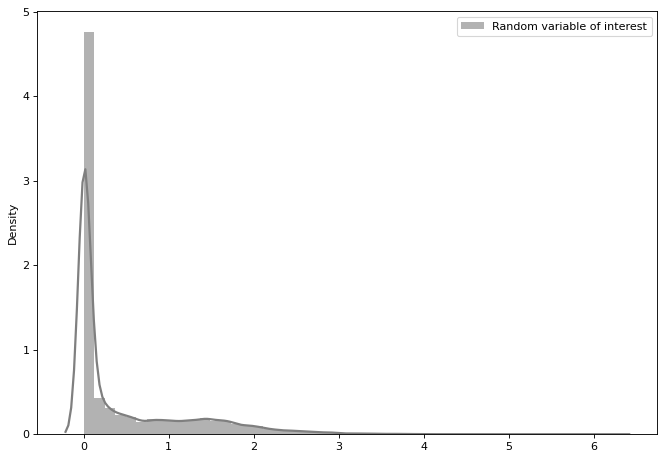

In [4]:
## Output pdf illustration
output_rv = problem.getRandomVector()
output_sample = np.array(output_rv.getSample(10000)).flatten()
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'bw':0.1, 'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(output_sample, color="C7", **kwargs, label="Random variable of interest")
plt.legend(loc='best');

# Benchmark

In [5]:
candidate_set_size = 2 ** 14
seq = ot.SobolSequence(distribution.getDimension())
sobol_experiment = ot.LowDiscrepancyExperiment(seq, distribution, candidate_set_size, False)
candidate_set = sobol_experiment.generate()

In [6]:
x_bench_sizes = list(range(6, 20, 2)) + list(range(20, 50, 5)) + list(range(50, 100, 10)) + list(range(100, 200, 50))  + list(range(200, 1000, 100))
my_methods = ['Matérn', 'Gaussian', 'Energy-distance', 'QMC']
bench = ctb.CentralTendencyBenchmark(my_methods, x_bench_sizes)

In [7]:
bench.scale_coefficient = 0.8
df_benchmark = bench.run_benchmark([problem], candidate_set)
df_benchmark = df_benchmark.reset_index()
df_benchmark.to_csv('res/ct_benchmark_{}.csv'.format(problem_name), index=False)

START: problem=Gaussian Peak 10D (normal input) | method=Matérn
START: problem=Gaussian Peak 10D (normal input) | method=Gaussian
START: problem=Gaussian Peak 10D (normal input) | method=Energy-distance
START: problem=Gaussian Peak 10D (normal input) | method=QMC
DONE: problem=Gaussian Peak 10D (normal input) | method=QMC
DONE: problem=Gaussian Peak 10D (normal input) | method=Energy-distance
DONE: problem=Gaussian Peak 10D (normal input) | method=Gaussian
DONE: problem=Gaussian Peak 10D (normal input) | method=Matérn


## Mean convergence

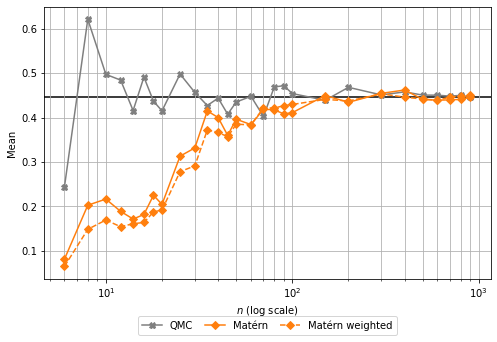

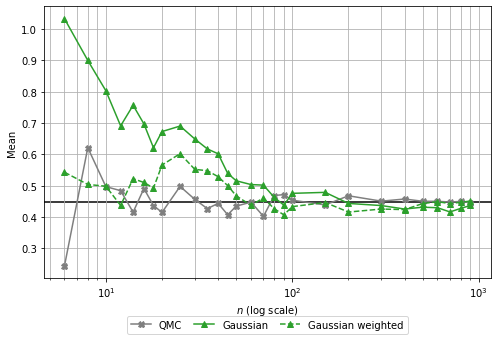

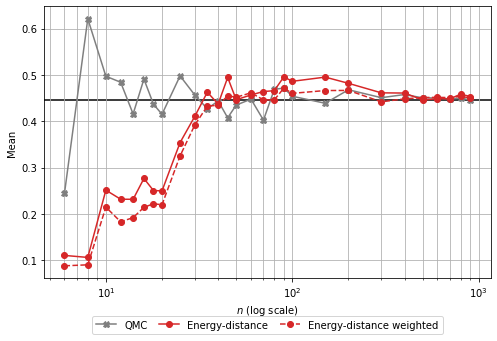

In [8]:
sfile = 'res/{}_convergence_Matern.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', 'Matérn'], save_file=sfile)
sfile = 'res/{}_convergence_Gaussian.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', None, 'Gaussian'], save_file=sfile)
sfile = 'res/{}_convergence_ED.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', None, None, 'Energy-distance'], save_file=sfile);

## MMD convergence

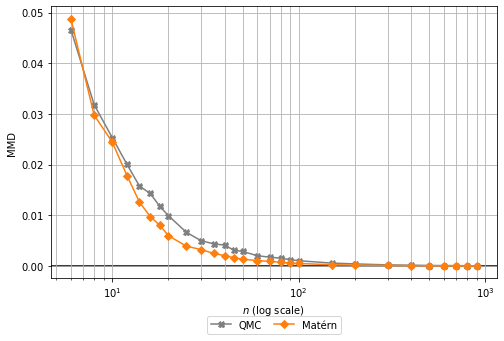

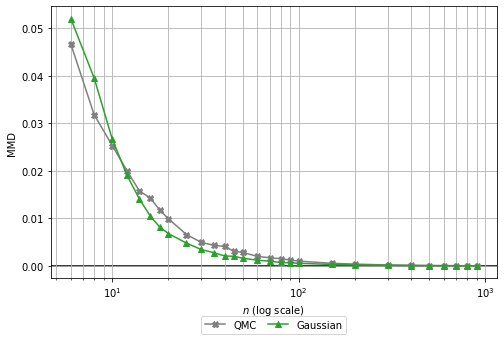

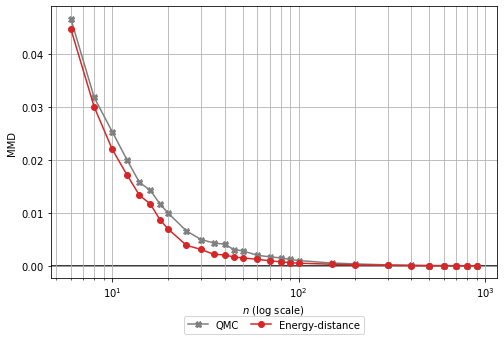

In [9]:
sfile = 'res/{}_convergence_MMD_Matern.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', 'Matérn'], is_MMD=True, save_file=sfile)
sfile = 'res/{}_convergence_MMD_Gaussian.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', None, 'Gaussian'], is_MMD=True, save_file=sfile)
sfile = 'res/{}_convergence_MMD_ED.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', None, None, 'Energy-distance'], is_MMD=True, save_file=sfile);